In [1]:
import requests as rq
import pandas as pd
from datetime import datetime as dt, timedelta as td
import matplotlib.pyplot as plt
import seaborn as sns
import json as js

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)

In [3]:
url = "https://raw.githubusercontent.com/tofrie03/ML_Assignment/refs/heads/main/Material/Energydata_Spain_2020-2025.csv"

df = pd.read_csv(url)

In [9]:
def explore_data():
    try:
        # Korrelationsmatrix
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", center=0)
        plt.title("Korrelationsmatrix der numerischen Variablen")
        plt.tight_layout()
        plt.show()

        # Histogramm der Außentemperatur
        plt.figure(figsize=(8, 5))
        sns.histplot(df["T_out"], kde=True)
        plt.title("Temperaturverteilung (T_out)")
        plt.xlabel("Temperatur (°C)")
        plt.tight_layout()
        plt.show()

        # Boxplot: Appliances vs. Temperaturbereiche
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=pd.cut(df["T_out"], bins=5), y="Appliances", data=df)
        plt.title("Appliances vs. Temperaturbereiche")
        plt.xlabel("Temperaturbereich (°C)")
        plt.ylabel("Energieverbrauch")
        plt.tight_layout()
        plt.show()

        # Pairplot ausgewählter Features
        selected = ["Appliances", "T_out", "RH_out", "Windspeed", "Visibility"]
        sns.pairplot(df[selected].sample(500))
        plt.suptitle("Beziehungen zwischen ausgewählten Variablen", y=1.02)
        plt.show()

    except Exception as e:
        print("Fehler bei der explorativen Analyse:", e)

In [10]:
def clean_data():
    try:
        # Prüfen ob die Datentypen aller Spalten korrekt sind
        print("Datentypen vor Cleaning:\n", df.dtypes)

        # Auf fehlende Werte prüfen
        missing = df.isnull().sum()
        print("Fehlende Werte pro Spalte:\n", missing)

        # Fehlende Werte bei numerischen Spalten mit dem Durchschnittswert auffüllen
        df.fillna(df.mean(numeric_only=True), inplace=True)

        # Duplikate indentifizieren und entfernen
        duplicates = df.duplicated().sum()
        print(f"Anzahl Duplikate: {duplicates}")

        df.drop_duplicates(inplace=True)

        print("Datenbereinigung abgeschlossen.")

    except Exception as e:
        print("Fehler bei der Datenbereinigung:", e)

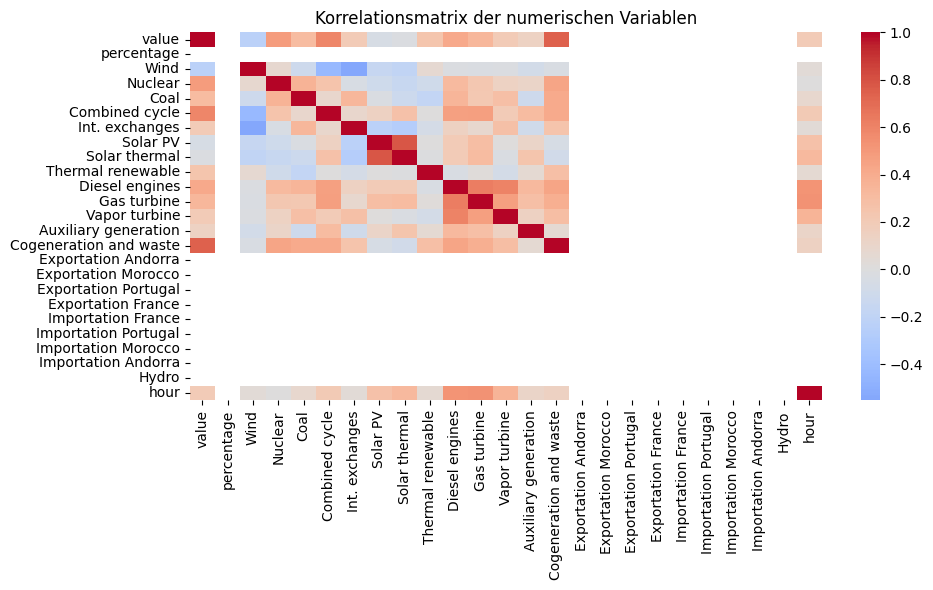

Fehler bei der explorativen Analyse: 'T_out'


<Figure size 800x500 with 0 Axes>

In [11]:
explore_data()